#**LAB Assignment - 4**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv('NIRF_Overall_2024.csv')

In [19]:
# Display the first few rows to understand the data
df.head()

,Unnamed: 0,Institute ID,Name,City,State,Score,Rank,Zone / Zonal Region
0,0,IR-O-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,86.42,1,Southern Zone
1,1,IR-O-U-0220,"Indian Institute of Science, Bengaluru",Bengaluru,Karnataka,83.28,2,Southern Zone
2,2,IR-O-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,81.37,3,Western Zone
3,3,IR-O-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,80.31,4,Northern Zone
4,4,IR-O-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,77.56,5,Central Zone


## **-> Creating a new column titled ‘Zone / Zonal Region’ and categorize each institute into one of the following six zones based on the state**

In [3]:
def categorize_zone(state):
    northern_zone = ['Chandigarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh', 'Punjab', 'Rajasthan']
    north_eastern_zone = ['Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim', 'Tripura']
    central_zone = ['Chhattisgarh', 'Madhya Pradesh', 'Uttarakhand', 'Uttar Pradesh']
    eastern_zone = ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal']
    western_zone = ['Dadra and Nagar Haveli and Daman and Diu', 'Goa', 'Gujarat', 'Maharashtra']
    southern_zone = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry', 'Tamil Nadu', 'Telangana', 'Andaman and Nicobar']

    if state in northern_zone:
        return 'Northern Zone'
    elif state in north_eastern_zone:
        return 'North Eastern Zone'
    elif state in central_zone:
        return 'Central Zone'
    elif state in eastern_zone:
        return 'Eastern Zone'
    elif state in western_zone:
        return 'Western Zone'
    elif state in southern_zone:
        return 'Southern Zone'
    else:
        return 'Unknown'

In [4]:
# Apply the categorization function to create the new column
df['Zone / Zonal Region'] = df['State'].apply(categorize_zone)

In [20]:
# Display the updated DataFrame with the new column
df[['Name', 'State', 'Zone / Zonal Region']].head()

,Name,State,Zone / Zonal Region
0,Indian Institute of Technology Madras,Tamil Nadu,Southern Zone
1,"Indian Institute of Science, Bengaluru",Karnataka,Southern Zone
2,Indian Institute of Technology Bombay,Maharashtra,Western Zone
3,Indian Institute of Technology Delhi,Delhi,Northern Zone
4,Indian Institute of Technology Kanpur,Uttar Pradesh,Central Zone


##**1. Among the top 5 states, which state has the highest number of ranked institutions in the NIRF rankings?**

<ipython-input-12-264ab19cf732>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='viridis')


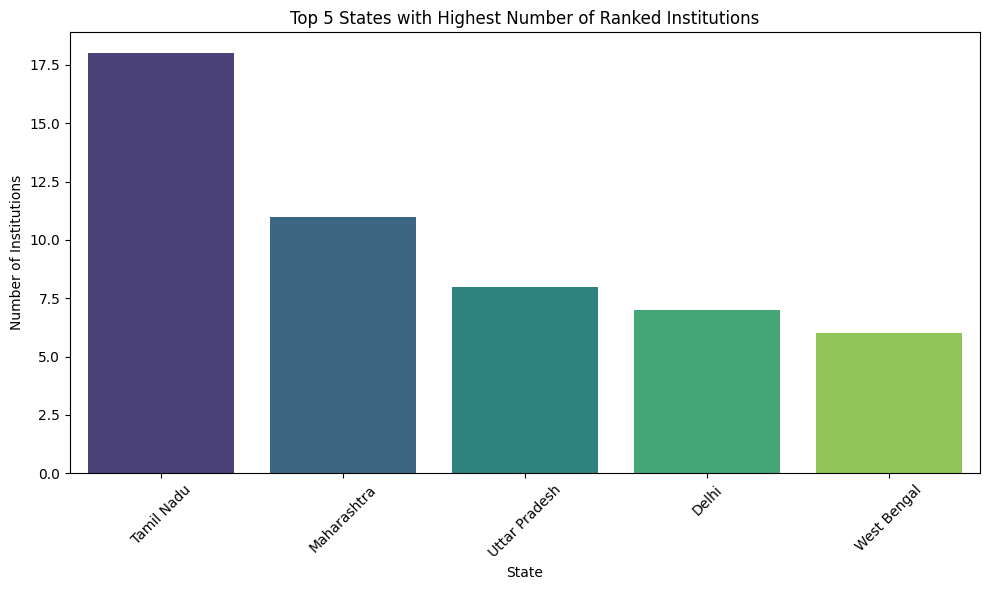

The state with the highest number of ranked institutions is: Tamil Nadu


In [12]:
top_5_states = df['State'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='viridis')
plt.title('Top 5 States with Highest Number of Ranked Institutions')
plt.xlabel('State')
plt.ylabel('Number of Institutions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The state with the highest number of ranked institutions is:", top_5_states.index[0])

##**2. Which states should the government focus on to improve their presence in the top 100 NIRF rankings? Identify the states that could benefit from increased investment in higher education**

<ipython-input-13-6a062f5dae34>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=states_to_focus.index, y=states_to_focus.values, palette='magma')


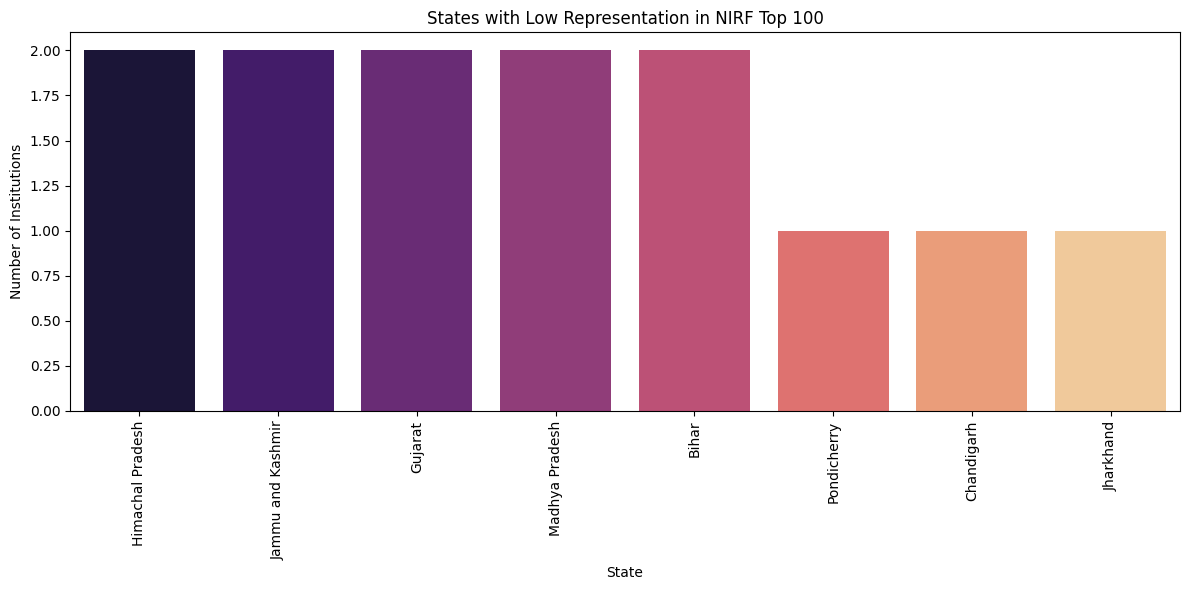

States that could benefit from increased investment in higher education:
Himachal Pradesh, Jammu and Kashmir, Gujarat, Madhya Pradesh, Bihar, Pondicherry, Chandigarh, Jharkhand


In [13]:
state_counts = df['State'].value_counts()
states_to_focus = state_counts[state_counts <= 2]

plt.figure(figsize=(12, 6))
sns.barplot(x=states_to_focus.index, y=states_to_focus.values, palette='magma')
plt.title('States with Low Representation in NIRF Top 100')
plt.xlabel('State')
plt.ylabel('Number of Institutions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("States that could benefit from increased investment in higher education:")
print(", ".join(states_to_focus.index))

##**3. Which zone has the highest representation in the NIRF rankings?**

<ipython-input-14-301c86ccc0ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_counts.index, y=zone_counts.values, palette='coolwarm')


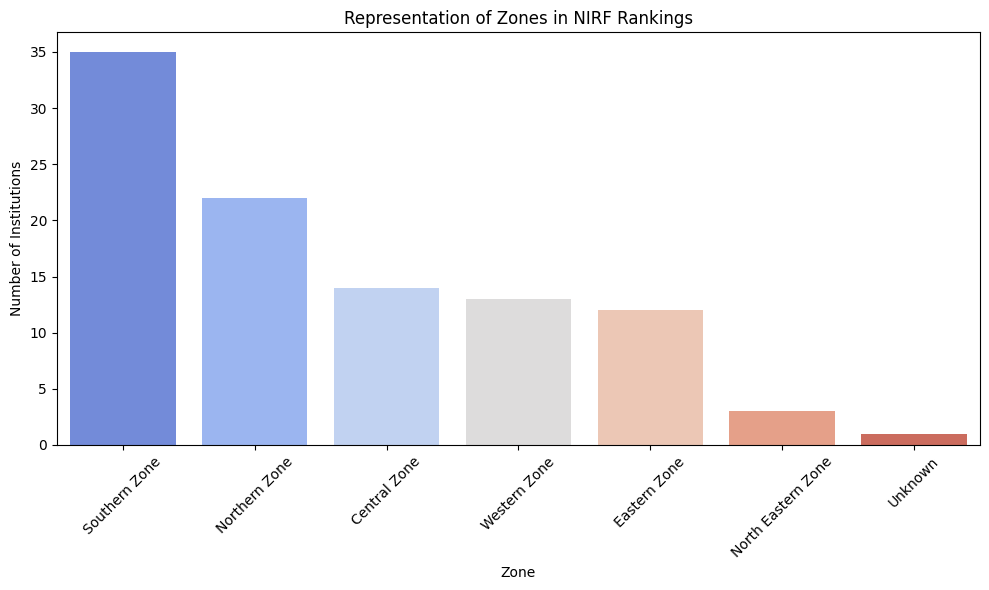

The zone with the highest representation is: Southern Zone


In [14]:
zone_counts = df['Zone / Zonal Region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=zone_counts.index, y=zone_counts.values, palette='coolwarm')
plt.title('Representation of Zones in NIRF Rankings')
plt.xlabel('Zone')
plt.ylabel('Number of Institutions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The zone with the highest representation is:", zone_counts.index[0])

##**4. Create two visualizations of the same data to discuss the “Lie Factor” in this context and explain how the visualization could mislead viewers.**

<ipython-input-16-e9fb611a12b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_states.index, y=top_5_states.values, ax=ax1, palette='viridis')
<ipython-input-16-e9fb611a12b4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_states.index, y=top_5_states.values, ax=ax2, palette='viridis')


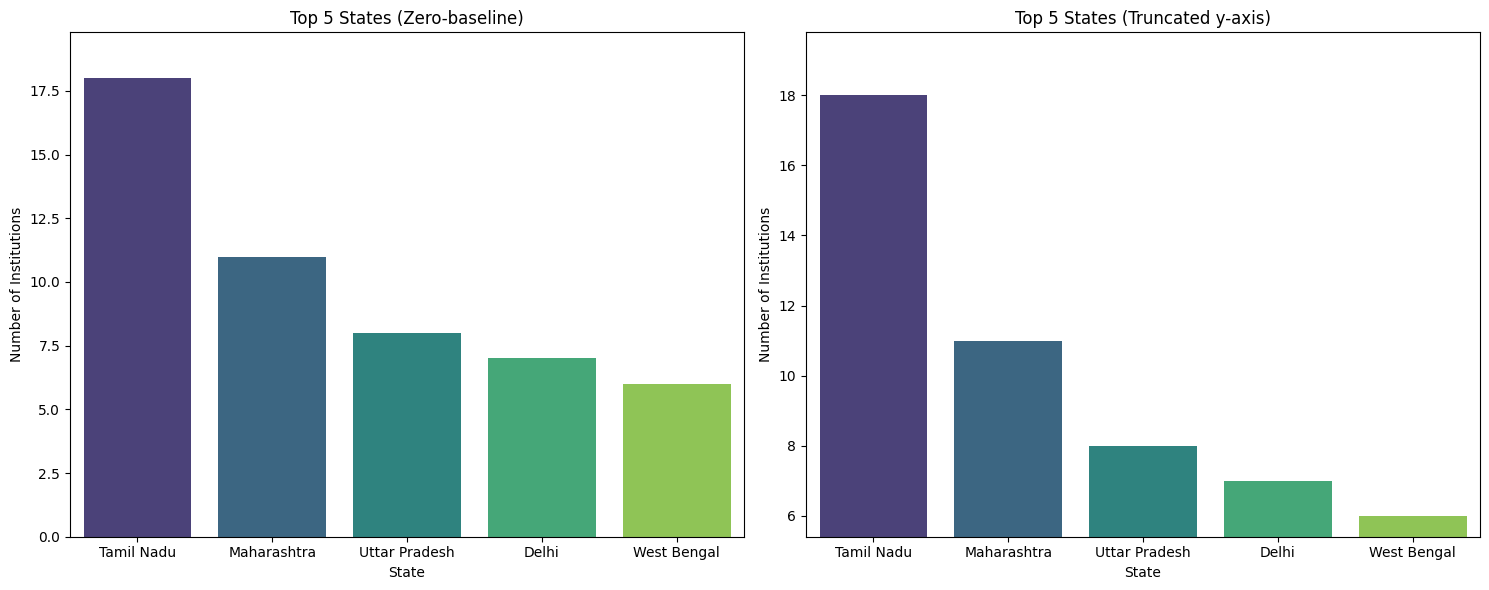

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Visualization 1: With zero-baseline
sns.barplot(x=top_5_states.index, y=top_5_states.values, ax=ax1, palette='viridis')
ax1.set_title('Top 5 States (Zero-baseline)')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Institutions')
ax1.set_ylim(0, max(top_5_states.values) * 1.1)

# Visualization 2: With truncated y-axis
sns.barplot(x=top_5_states.index, y=top_5_states.values, ax=ax2, palette='viridis')
ax2.set_title('Top 5 States (Truncated y-axis)')
ax2.set_xlabel('State')
ax2.set_ylabel('Number of Institutions')
ax2.set_ylim(min(top_5_states.values) * 0.9, max(top_5_states.values) * 1.1)

plt.tight_layout()
plt.show()

##**5. Visualize the distribution of scores among all institutions.**

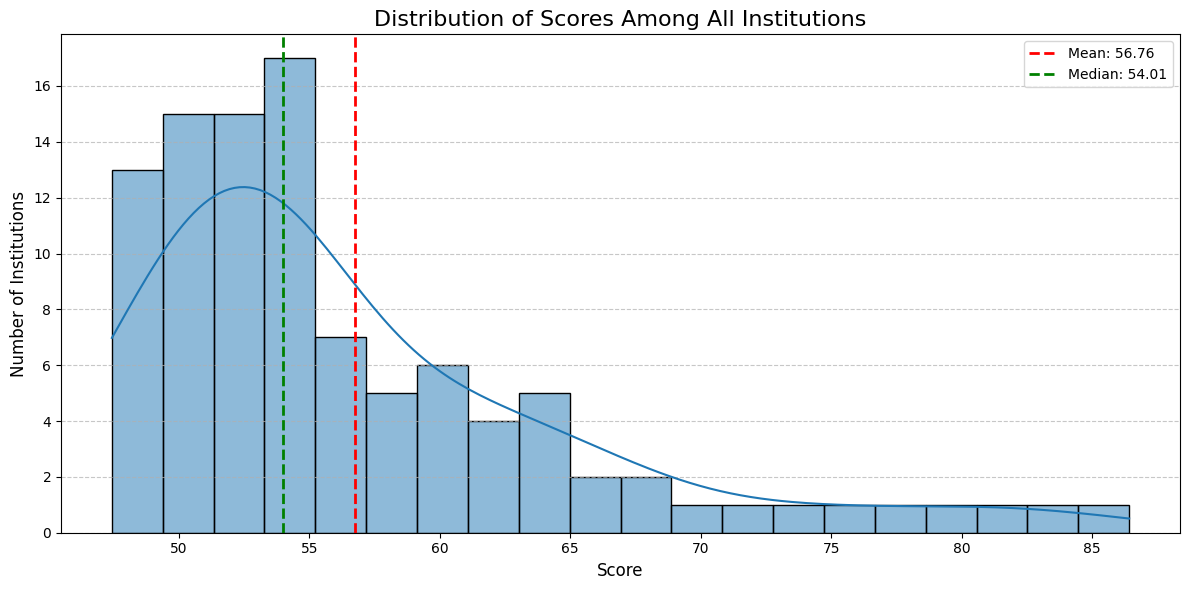

Mean Score: 56.76
Median Score: 54.01


In [11]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Score', kde=True, bins=20)
plt.title('Distribution of Scores Among All Institutions', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Number of Institutions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add mean and median lines
mean_score = df['Score'].mean()
median_score = df['Score'].median()
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_score:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Mean Score: {mean_score:.2f}")
print(f"Median Score: {median_score:.2f}")

#**Thankyou !!**